# **Google Dopamine**
New Framework for Flexible and Reproducible Reinforcement Learning Research



## **Introduction**

Reinforcement learning is an important domain of machine learning. Which mimics the human level learning. RL has gain a lot of momentum over the past few years. More and more researh has been done in RL results in the improvements in the reinforcement learning methodolgies and techniques. Google has announced new Reinforcement learning tensor flow based framework called Dopamine. Which aims to provide flexibility, stability, and reproducibility for new and experienced RL researchers alike. Inspired by one of the main components in reward-motivated behaviour in the brain and reflecting the strong historical connection between neuroscience and reinforcement learning research, this platform aims to enable the kind of speculative research that can drive radical discoveries. 


*   Ease of use 
*   Reproducibility
*   Benchmarking 


# Here we will code our simple agent using google **Dopamine**.

In [1]:
# @title Install necessary packages.
#dopamine for RL
!pip install --upgrade --no-cache-dir dopamine-rl
# dopamine dependencies
!pip install cmake
#Arcade Learning Environment
!pip install atari_py

    100% |████████████████████████████████| 71kB 4.5MB/s 
    100% |████████████████████████████████| 1.5MB 16.3MB/s 
    100% |████████████████████████████████| 1.0MB 26.8MB/s 
  Running setup.py install for gym ... - \ | done
    100% |████████████████████████████████| 17.7MB 668kB/s 
    100% |████████████████████████████████| 768kB 9.2MB/s 
  Running setup.py bdist_wheel for atari-py ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in direct

In [0]:
# @title Necessary imports and globals
import numpy as np
import os
#DQN for baselines
from dopamine.agents.dqn import dqn_agent
from dopamine.atari import run_experiment
from dopamine.colab import utils as colab_utils
#warnings
from absl import flags

#where to store training logs
BASE_PATH = '/tmp/colab_dope_run'  # @param
#which arcade environment?
GAME = 'Pong'  # @param

In [0]:
# @title Create a  new agent from scratch.

#define where to store log data
LOG_PATH = os.path.join(BASE_PATH, 'basic_agent', GAME)

class BasicAgent(object):
  """This agent randomly selects an action and sticks to it. It will change
  actions with probability switch_prob."""
  def __init__(self, sess, num_actions, switch_prob=0.1):
    #tensorflow session
    self._sess = sess
    #how many possible actions can it take?
    self._num_actions = num_actions
    # probability of switching actions in the next timestep?
    self._switch_prob = switch_prob
    #initialize the action to take (randomly)
    self._last_action = np.random.randint(num_actions)
    #not debugging
    self.eval_mode = False
  
  #How select an action? 
  #we define our policy here
  def _choose_action(self):
    if np.random.random() <= self._switch_prob:
      self._last_action = np.random.randint(self._num_actions)
    return self._last_action
    
  #when it checkpoints during training, anything we should do?
  def bundle_and_checkpoint(self, unused_checkpoint_dir, unused_iteration):
    pass
    
  #loading from checkpoint
  def unbundle(self, unused_checkpoint_dir, unused_checkpoint_version,
               unused_data):
    pass
  
  #first action to take
  def begin_episode(self, unused_observation):
    return self._choose_action()
  
  #cleanup
  def end_episode(self, unused_reward):
    pass
  
  #we can update our policy here
  #using the reward and observation
  #dynamic programming, Q learning, monte carlo methods, etc.
  def step(self, reward, observation):
    return self._choose_action()
  
def create_basic_agent(sess, environment):
  """The Runner class will expect a function of this type to create an agent."""
  return BasicAgent(sess, num_actions=environment.action_space.n,
                     switch_prob=0.2)

# Create the runner class with this agent. We use very small numbers of steps
# to terminate quickly, as this is mostly meant for demonstrating how one can
# use the framework. We also explicitly terminate after 110 iterations (instead
# of the standard 200) to demonstrate the plotting of partial runs.
basic_runner = run_experiment.Runner(LOG_PATH,
                                      create_basic_agent,
                                      game_name=GAME,
                                      num_iterations=200,
                                      training_steps=10,
                                      evaluation_steps=10,
                                      max_steps_per_episode=100)

In [12]:
# @title Train Basic Agent.
print('Will train basic agent, please be patient, may be a while...')
basic_runner.run_experiment()
print('Done training!')

Will train basic agent, please be patient, may be a while...
INFO:tensorflow:Beginning training...
INFO:tensorflow:Starting iteration 0
INFO:tensorflow:Average undiscounted return per training episode: -2.00
INFO:tensorflow:Average training steps per second: 676.90
INFO:tensorflow:Average undiscounted return per evaluation episode: -2.00
INFO:tensorflow:Starting iteration 1
INFO:tensorflow:Average undiscounted return per training episode: -2.00
INFO:tensorflow:Average training steps per second: 697.19
INFO:tensorflow:Average undiscounted return per evaluation episode: -2.00
INFO:tensorflow:Starting iteration 2
INFO:tensorflow:Average undiscounted return per training episode: -2.00
INFO:tensorflow:Average training steps per second: 704.06
INFO:tensorflow:Average undiscounted return per evaluation episode: -1.00
INFO:tensorflow:Starting iteration 3
INFO:tensorflow:Average undiscounted return per training episode: -2.00
INFO:tensorflow:Average training steps per second: 695.77
INFO:tensor

In [0]:

# @title Load baseline data# @titl 
!gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* /content/
experimental_data = colab_utils.load_baselines('/content')

In [15]:
# @title Load the training logs.
basic_data = colab_utils.read_experiment(log_path=LOG_PATH, verbose=True)
basic_data['agent'] = 'BasicAgent'
basic_data['run_number'] = 1
experimental_data[GAME] = experimental_data[GAME].merge(basic_data,
                                                        how='outer')

Reading statistics from: /tmp/colab_dope_run/basic_agent/Pong//logs/log_199


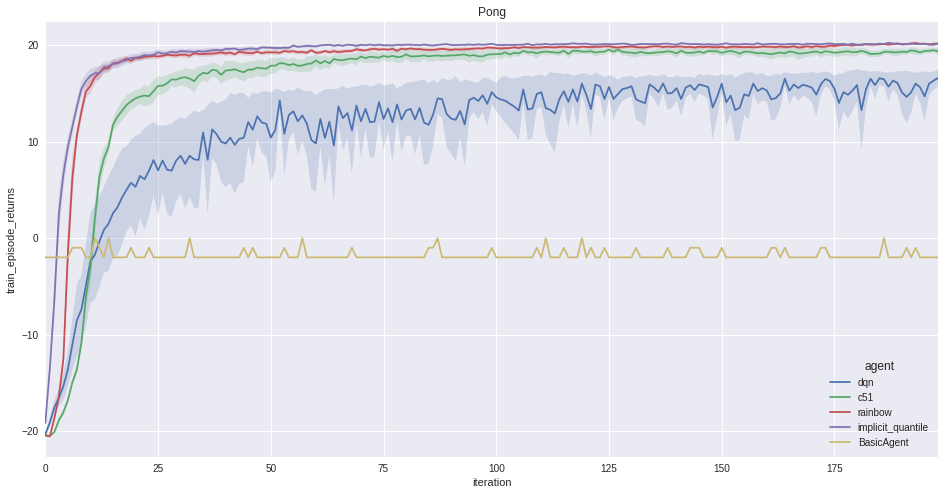

In [16]:
# @title Plot training results.

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=experimental_data[GAME], time='iteration', unit='run_number',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title(GAME)
plt.show()

So is the training results of agent which we trained above. 

You can find this in github too. 
Follow AI based punlication on Medium **"The 21st Century"**
https://medium.com/the-21st-century


**Hamza Abdullah **